### Setup

In [ ]:
!pip install geopandas # Tables with spatial queries

In [ ]:
# Recipe for installing Cartopy: https://github.com/googlecolab/colabtools/issues/85
#!apt-get install libproj-dev proj-data proj-bin
#!apt-get install libgeos-dev
#!pip install cython
!pip install cartopy # Maps

In [1]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd

from matplotlib import pyplot as plt

In [2]:
import cartopy.io.img_tiles as cimgt

In [3]:
#import cartopy

In [4]:
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)










### Import tables

In [5]:
import os.path as osp

In [6]:
DATA_PATH = osp.join(os.environ['DATA_PATH'], 'cciw/Data')

In [7]:
#DATA_PATH = r'/content/drive/My Drive/Data'
analysis_path = os.path.join(DATA_PATH, 'Tables', 'Analysis.csv')
dive_path = os.path.join(DATA_PATH, 'Tables', 'Dives.csv')
site_path = os.path.join(DATA_PATH, 'Tables', 'Sites.csv')
merged_path = os.path.join(DATA_PATH, 'Tables', 'MergedTable.csv')
simplified_path = os.path.join(DATA_PATH, 'Tables', 'SimplifiedImagingAnalysis.csv')

In [8]:
analysis_df = pd.read_csv(analysis_path, index_col=0,
                          dtype={'Count':float})
dive_df = pd.read_csv(dive_path, index_col=0, parse_dates=['Date'])
site_df = pd.read_csv(site_path, index_col=0)
merged_df = pd.read_csv(merged_path, index_col=0)
simplified_df = pd.read_csv(simplified_path, index_col=0)

### Map diving sites on map

In [9]:
site_df.set_index('PSN')

,Latitude,Longitude,Name,Lake
PSN,,,,
1353,42.84072,-79.67396,Tecumseh Shoal,Erie
1354,42.81666,-79.70433,Tecumseh Shoal,Erie
1355,42.79914,-79.73840,Tecumseh Shoal,Erie
1356,42.79072,-79.75648,Tecumseh Shoal,Erie
1274,42.83975,-79.55354,Rock Point,Erie
...,...,...,...,...
1498,43.22734,-79.28509,Dalhousie,Ontario
1499,43.21944,-79.27194,Dalhousie,Ontario
1500,43.21563,-79.25978,Dalhousie,Ontario


In [ ]:
cimgt.Stamen?

In [10]:
stamen_terrain = cimgt.Stamen(style='terrain-background')
 # Load basemap online

In [11]:
# Convert DataFrame to GeoDataFrame with WGS-1984 (GPS latitude/longitude) coordinate reference system 
site_gdf = gpd.GeoDataFrame(site_df,
                            crs={'init': 'epsg:4326'},
                            geometry=gpd.points_from_xy(site_df.Longitude, site_df.Latitude))

/home/angus/anaconda3/envs/cciw/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [12]:
# Reproject site coordinates to basemap crs
site_gdf = site_gdf.to_crs(stamen_terrain.crs.proj4_params)

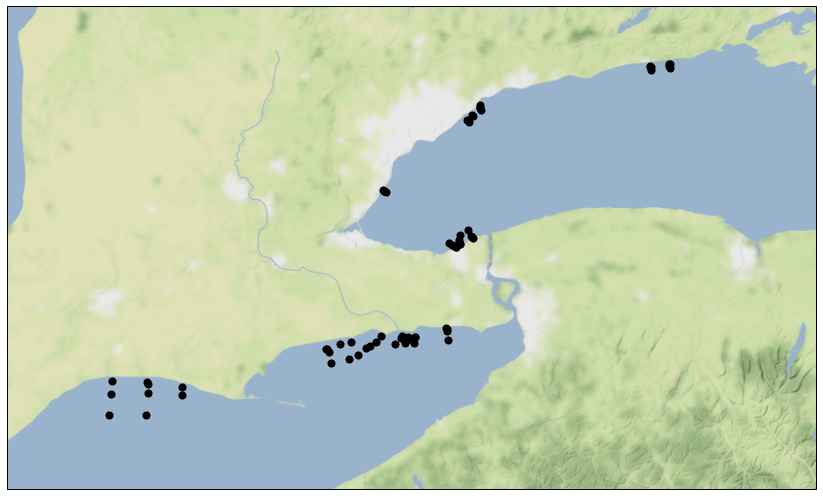

In [13]:
# Map sites on basemap
#fig = plt.figure(figsize=(15, 15))
fig = plt.figure(figsize=(12, 7))
ax = plt.axes(projection=stamen_terrain.crs)
ax.set_extent([-81.8, -77.2, 42.2, 44.2])
ax.add_image(stamen_terrain, 8)
#site_gdf.plot(ax=ax, markersize=50, marker='o', facecolor='none', edgecolor='k')
site_gdf.plot(ax=ax, markersize=50, facecolor='k')
plt.tight_layout()
#fig.savefig('dive-sites.eps', format='eps')
#fig.savefig('dive-sites.jpg', format='jpg')

In [ ]:
#site_gdf.plot?

### Dive table exploration

In [14]:
dive_df

,Cruise #,CSN,PSN,Date,Depth (m),Overall Coverage,Silt (%),Clay (%),Sand (%),Gravel (%),Cobble (%),Rock (%),Bedrock (%),Boulders (%),Shale (%),Underlying Substrate Type,Underlying Substrate Depth (cm)
Dive Index,,,,,,,,,,,,,,,,,
0,201800901,1,3554,2018-06-19,20.9,1.0,0,0,100,0.0,0.0,0,0,0,0.0,NaN,NaN
1,201800901,2,3553,2018-06-19,12.1,85.0,0,0,0,5.0,10.0,80,0,5,0.0,Bedrock,NaN
2,201800901,3,3552,2018-06-20,6.0,90.0,0,0,0,0.0,10.0,30,40,20,0.0,NaN,NaN
3,201800901,4,3555,2018-06-20,3.3,2.5,0,0,0,5.0,5.0,0,90,0,0.0,Bedrock,NaN
4,201800901,5,3537,2018-06-20,20.4,10.0,0,0,80,0.0,15.0,5,0,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,2017-01-903,8,1351,2017-08-16,3.7,7.5,0,0,0,2.0,3.0,5,80,10,0.0,NaN,NaN
532,2017-01-903,9,1348,2017-08-17,18.8,60.0,15,10,0,25.0,25.0,25,0,0,0.0,Glacial Till,NaN
533,2017-01-903,10,1347,2017-08-17,10.7,70.0,5,0,0,20.0,25.0,40,0,10,0.0,Glacial Till,NaN


In [15]:
# All boat cruise campaigns
all_cruises = dive_df['Cruise #'].unique()
all_cruises

array(['201800901', '201800902', '201800903', '2012-01-607',
       '2012-01-609', '2012-01-613', '2013-00-601', '2013-01-601',
       '2013-01-604', '2013-01-610', '2013-01-613', '2014-01-602',
       '2014-01-605', '2014-01-607', '2014-01-609', '2015-01-601',
       '2015-01-602', '2016186-004-012', '2017-00-901', '2017-00-902',
       '2017-00-903', '2017-01-901', '2017-01-902', '2017-01-903'],
      dtype=object)

In [16]:
print(f"Total number of boat cruises: {len(all_cruises)}")

Total number of boat cruises: 24


In [17]:
# Count number of dives for each day
dive_df_by_date = dive_df.groupby(by='Date')['PSN'].count()
dive_df_by_date

Date
2012-07-09    1
2012-07-10    4
2012-07-11    5
2012-07-12    5
2012-07-13    1
             ..
2018-08-08    4
2018-08-09    1
2018-08-13    4
2018-08-14    4
2018-08-16    4
Name: PSN, Length: 127, dtype: int64

In [18]:
print(f"Total number of days of diving: {len(dive_df_by_date)}")

Total number of days of diving: 127


In [19]:
print(f"Date range for diving: {dive_df_by_date.index.min().strftime('%Y-%b-%d')} \
to {dive_df_by_date.index.max().strftime('%Y-%b-%d')}")

Date range for diving: 2012-Jul-09 to 2018-Aug-16


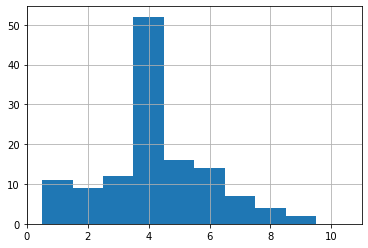

In [20]:
# Frequency for number of dives per day
dive_df_by_date.hist(bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])

In [21]:
# Number of dives for each year-month
dive_df['Year-Month'] = dive_df['Date'].dt.strftime('%Y-%m')
dive_df_by_year_month = dive_df.groupby(by='Year-Month').count()['PSN']
dive_df_by_year_month.index = [datetime.strptime(year_month, '%Y-%m') for year_month in dive_df_by_year_month.index]
dive_df_by_year_month

2012-07-01    29
2012-08-01    34
2012-09-01    16
2013-04-01     7
2013-05-01    45
2013-06-01    31
2013-07-01    34
2013-09-01     9
2014-05-01    18
2014-06-01    13
2014-07-01    17
2014-08-01    33
2014-09-01    27
2014-10-01     6
2015-07-01    39
2016-07-01    26
2017-06-01    28
2017-07-01    28
2017-08-01    36
2018-06-01    20
2018-07-01    20
2018-08-01    20
Name: PSN, dtype: int64

In [22]:
def line_format(label): # https://stackoverflow.com/questions/30133280/pandas-bar-plot-changes-date-format
    """
    Convert time label to the format of pandas line plot
    """
    month = label.month_name()[:3]
    if month == 'Jul':
        month += f'\n{label.year}'
    elif month in ['Apr','May','Jun']:
        month += f'\n>'
    elif month in ['Aug','Sep','Oct']:
        month += f'\n<'
    return month

[Text(0, 0, 'Jul\n2012'),
 Text(0, 0, 'Aug\n<'),
 Text(0, 0, 'Sep\n<'),
 Text(0, 0, 'Apr\n>'),
 Text(0, 0, 'May\n>'),
 Text(0, 0, 'Jun\n>'),
 Text(0, 0, 'Jul\n2013'),
 Text(0, 0, 'Sep\n<'),
 Text(0, 0, 'May\n>'),
 Text(0, 0, 'Jun\n>'),
 Text(0, 0, 'Jul\n2014'),
 Text(0, 0, 'Aug\n<'),
 Text(0, 0, 'Sep\n<'),
 Text(0, 0, 'Oct\n<'),
 Text(0, 0, 'Jul\n2015'),
 Text(0, 0, 'Jul\n2016'),
 Text(0, 0, 'Jun\n>'),
 Text(0, 0, 'Jul\n2017'),
 Text(0, 0, 'Aug\n<'),
 Text(0, 0, 'Jun\n>'),
 Text(0, 0, 'Jul\n2018'),
 Text(0, 0, 'Aug\n<')]

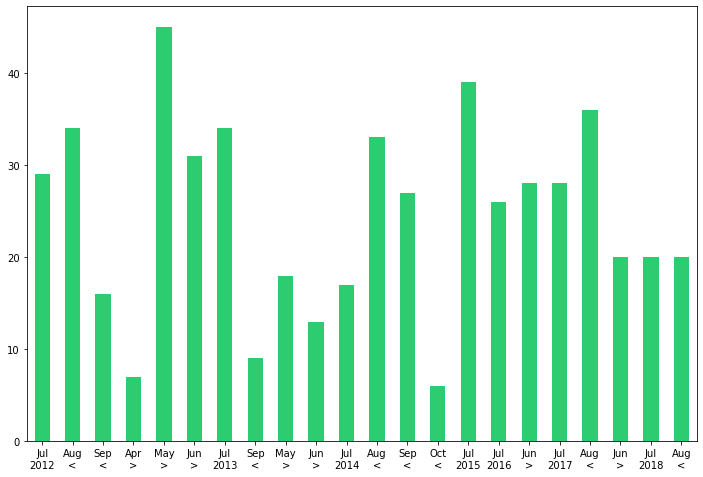

In [23]:
# Note that we specify rot here
ax = dive_df_by_year_month.plot(kind='bar', figsize=(12, 8), color='#2ecc71', rot=0)
ax.set_xticklabels(map(lambda x: line_format(x), dive_df_by_year_month.index))

In [24]:
# Number of dives for each year
dive_df['Year'] = dive_df['Date'].dt.year
dive_df_by_year = dive_df.groupby(by='Year').count()['PSN']
#dive_df_by_year.index = [datetime.strptime(year, '%Y-%m') for year_month in dive_df_by_year_month.index]
dive_df_by_year

Year
2012     79
2013    126
2014    114
2015     39
2016     26
2017     92
2018     60
Name: PSN, dtype: int64

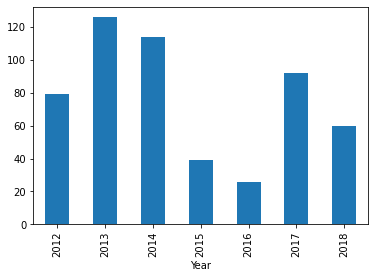

In [25]:
dive_df_by_year.plot.bar()

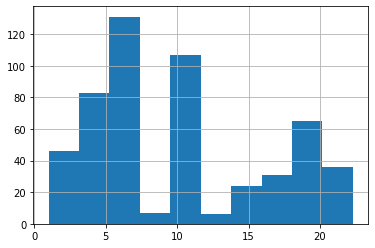

In [26]:
# Depth in meters of the lake bed at the diving site
dive_df['Depth (m)'].hist()

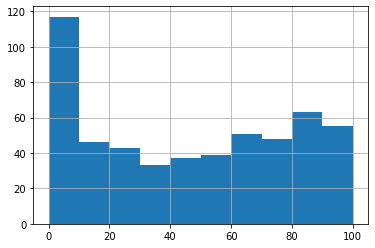

In [27]:
# Overall percentage mussels coverage for the whole extent of the diving site (as estimated visually by diver)
dive_df['Overall Coverage'].hist()
# Note: this should not be used to estimate percentage coverage within a quadrat

In [28]:
# Estimated substrate proportion of the lake bed
dive_substrate_df = dive_df[['Silt (%)', 'Clay (%)', 'Sand (%)', 'Gravel (%)', 
                             'Cobble (%)', 'Rock (%)', 'Bedrock (%)', 
                             'Boulders (%)', 'Shale (%)']]
dive_substrate_df

,Silt (%),Clay (%),Sand (%),Gravel (%),Cobble (%),Rock (%),Bedrock (%),Boulders (%),Shale (%)
Dive Index,,,,,,,,,
0,0,0,100,0.0,0.0,0,0,0,0.0
1,0,0,0,5.0,10.0,80,0,5,0.0
2,0,0,0,0.0,10.0,30,40,20,0.0
3,0,0,0,5.0,5.0,0,90,0,0.0
4,0,0,80,0.0,15.0,5,0,0,0.0
...,...,...,...,...,...,...,...,...,...
531,0,0,0,2.0,3.0,5,80,10,0.0
532,15,10,0,25.0,25.0,25,0,0,0.0
533,5,0,0,20.0,25.0,40,0,10,0.0


/home/angus/anaconda3/envs/cciw/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9edf078c88>,
      dtype=object)

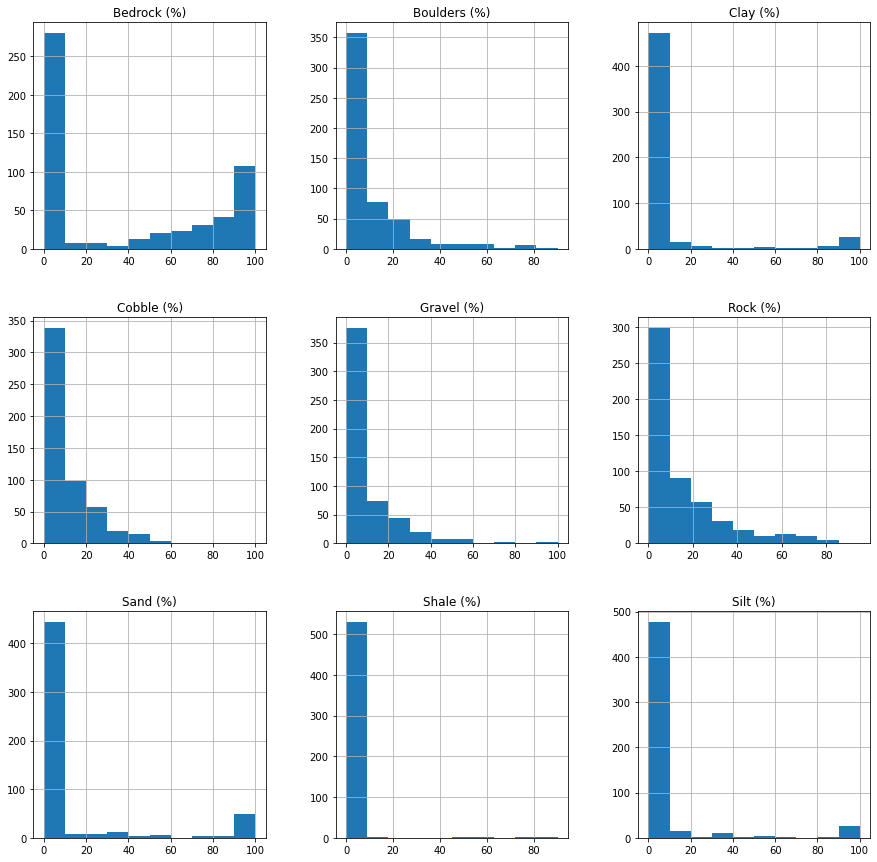

In [29]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
dive_substrate_df.hist(ax=ax)

In [30]:
dive_df['Underlying Substrate Type'].unique()

array([nan, 'Bedrock', 'Rock', 'Fractured bedrock', 'Rocks & silt',
       'Till minus clay', 'Cobble, gravel & rock',
       'Boulders & rock field', 'Boulder field', 'Glacial till',
       'Shale bedrock', 'Gravel & rock', 'Gravel and Cobble',
       'Cobble/gravel', 'Glacial Till', 'Shale/Clay', 'Clay', 'Sand',
       'Clay ', 'Stepped Limestone', 'Gravel', 'Gravel/Cobble',
       'Clay till', 'Brittle clay/shale', 'Hard Clay', 'Shale/clay',
       'Clay/Shale', 'Rocks', 'Pitted Bedrock'], dtype=object)

In [31]:
dive_df['Underlying Substrate Depth (cm)'].unique()

array([nan, '0', '10', '15', '2.5', '1', '2', '3', '4', '5', '7.5', '0.5',
       '20-30', '1-5', '8', '0.05', '7-10', '3-4', 'Deep', '0-30',
       'Variable under roots', 'Unreachable', 'Variable ', '1.5'],
      dtype=object)

### Analysis Table Exploration

In [32]:
analysis_df = analysis_df.set_index('Analysis Index')
analysis_df

,Dive Index,Quadrat,Live Coverage,Empty Coverage,Biomass,Count,16mm,14mm,12.5mm,10mm,8mm,6.3mm,4mm,2mm
Analysis Index,,,,,,,,,,,,,,
0,0,1,0.0,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,2,0.0,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,3,3.0,0.0,45.17,132.0,0.007576,0.037879,0.250000,0.045455,0.030303,0.053030,0.234848,0.340909
3,1,1,98.0,0.0,345.11,833.0,0.000000,0.004802,0.075630,0.490996,0.181273,0.042017,0.088836,0.116447
4,1,2,99.0,0.0,319.84,647.0,0.000000,0.003091,0.091190,0.596600,0.202473,0.034003,0.035549,0.037094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,534,2,50.0,2.0,176.19,376.0,0.000000,0.000000,0.061170,0.441489,0.148936,0.125000,0.170213,0.053191
1604,534,3,40.0,5.0,173.68,401.0,0.000000,0.000000,0.059850,0.403990,0.184539,0.152120,0.104738,0.094763
1605,535,1,90.0,1.0,263.57,986.0,0.000000,0.000000,0.012170,0.250507,0.209939,0.118661,0.160243,0.248479


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9edeefb438>,
      dtype=object)

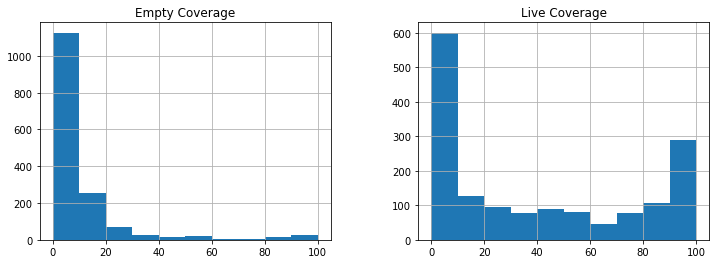

In [33]:
analysis_df[['Live Coverage', 'Empty Coverage']].hist(figsize=(12,4))

Text(0.5, 0, 'Count (#)')

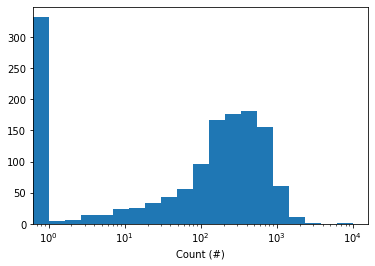

In [34]:
# Frequency of mussels count within a quadrat
plt.hist(analysis_df['Count'].values, bins=[0]+list(np.logspace(np.log10(1),np.log10(10000), 20)))
plt.gca().set_xscale("log")
plt.xlabel('Count (#)')

Text(0.5, 0, 'Biomass (g)')

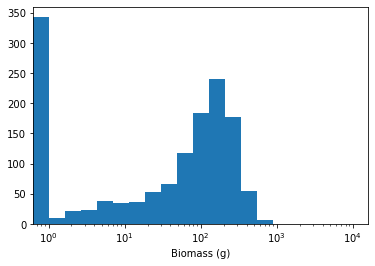

In [35]:
# Frequency of mussels biomass in grams within a quadrat
plt.hist(analysis_df['Biomass'].values, bins=[0]+list(np.logspace(np.log10(1),np.log10(10000), 20)))
plt.gca().set_xscale("log")
plt.xlabel('Biomass (g)')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ee158b320>,
      dtype=object)

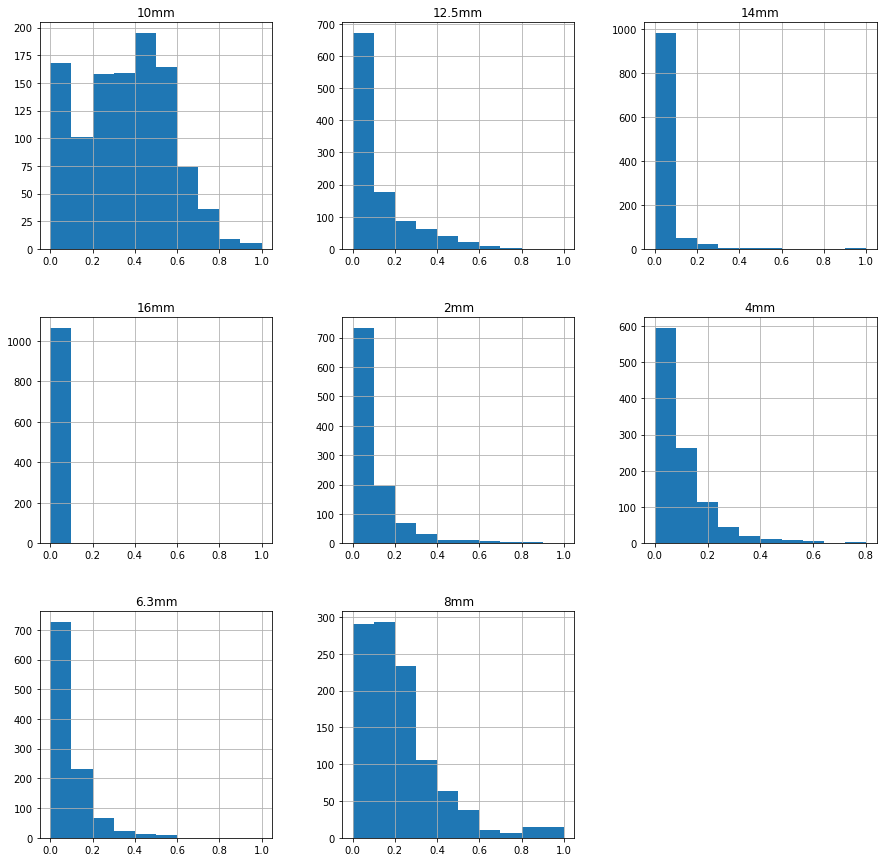

In [36]:
analysis_df[['16mm', '14mm', '12.5mm', '10mm', '8mm', '6.3mm', '4mm', '2mm']].hist(figsize=(15,15))

### Count number of rows for each analysis type

In [ ]:
n_alive = len(analysis_df['Live Coverage'].dropna())
print(f"Number of % live coverage data: {n_alive}")

n_empty = len(analysis_df['Empty Coverage'].dropna())
print(f"Number of % empty coverage data: {n_empty}")

n_biomass = len(analysis_df['Biomass'].dropna())
print(f"Number of biomass data: {n_biomass}")

n_count = len(analysis_df['Count'].dropna())
print(f"Number of count data: {n_count}")

n_bysize = len(analysis_df['10mm'].dropna())
print(f"Number of sorted mussels size data: {n_bysize}")

In [ ]:
merged_df.columns

In [ ]:
n_alive = len(merged_df['Live Coverage'].dropna())
print(f"Number of % live coverage data associated with image/video/still: {n_alive}")

n_empty = len(merged_df['Empty Coverage'].dropna())
print(f"Number of % empty coverage data associated with image/video/still: {n_empty}")

n_biomass = len(merged_df['Biomass'].dropna())
print(f"Number of biomass data associated with image/video/still: {n_biomass}")

n_count = len(merged_df['Count'].dropna())
print(f"Number of count data associated with image/video/still: {n_count}")

n_bysize = len(merged_df['10mm'].dropna())
print(f"Number of sorted mussels size data associated with image/video/still: {n_bysize}")

In [ ]:
simplified_df.columns

In [ ]:
n_alive = len(simplified_df['Live Coverage'].dropna())
print(f"Number of % live coverage data with at least one image: {n_alive}")

n_empty = len(simplified_df['Empty Coverage'].dropna())
print(f"Number of % empty coverage data with at least one image: {n_empty}")

n_biomass = len(simplified_df['Biomass'].dropna())
print(f"Number of biomass data with at least one image: {n_biomass}")

n_count = len(simplified_df['Count'].dropna())
print(f"Number of count data with at least one image: {n_count}")

n_bysize = len(simplified_df['10mm'].dropna())
print(f"Number of sorted mussels size data with at least one image: {n_bysize}")